In [3]:
from PIL import Image
import numpy as np

In [4]:
# Open images using Image 
fig1 = Image.open("Fig1.tif")
fig2 = Image.open("Fig2.tif")
fig3 = Image.open("Fig3.tif")

In [5]:
# LZW Encoder function
def LZWEncoder(input_image):
    image = np.array(input_image)
    row, col = image.shape
    intensity = 256 # Total intensities
    size = 256 # Initial dictionary size

    # Create initial dictionary
    dict = {str(i): i for i in range(intensity)}
    encoding = []
    
    prev = ""
    # Iterate over all intensities of image
    for i in range(row):
        for j in range(col):
            current = str(image[i][j])
            sequence = ""
            if(prev == ""):
                sequence = current
            else:
                sequence = prev + "-" + current
            
            if(sequence in dict):
                prev = sequence
            else:
                encoding.append(dict[prev])
                dict[sequence] = size # Add sequence to dictionary
                size = size + 1 # Increment the size of dictionary
                prev = current
                
    encoding.append(dict[prev])
    
    return encoding

In [6]:
# LZW Decoder function
# def LZWDecoder(encoding):
def LZWDecoder(fp):
    encoding=[]
    for line in fp: 
      for code in line.split("-"):
        if(code!=""):
          encoding.append(int(code))
    encoding=np.array(encoding)
    n = encoding.size
    intensity = 256
    size = 256
    # Create initial dictionary
    dict = {i: str(i) for i in range(intensity)}
    
    prev = encoding[0]
    code = dict[prev]
    decoded_data = []
    decoded_data.append(dict[prev])
    
    # Iterate over each encoding
    for i in range(1, n):
        current = encoding[i]
        data = ""
        
        if(current in dict):
            data = dict[current]
        else:
            data = dict[prev]
            data = data + "-" + code
        
        code = data.split("-")[0]
        
        count_code = data.count("-")+1
        for j in range(count_code):
            decoded_data.append(data.split("-")[j])
        
        seq = dict[prev] + "-" + code
        dict[size]=seq
        size = size + 1
        prev = current
    row=256
    col=256
    row, col=fig1.size
    decoded_image_array = (np.array(decoded_data)).reshape(row, col)
    fig = Image.fromarray(decoded_image_array.astype(np.uint8))
    fig = fig.convert("L")
    return fig

# Part 1, 2

In [7]:
# Encoding Fig1
encoding1= LZWEncoder(fig1)

with open('Fig1_lzw.lzw', 'w') as fp1:
    # Write the encoding in the file separated by "-"
    for code in encoding1:
      fp1.write(str(code))
      fp1.write("-")

# Decoding Fig1
with open('Fig1_lzw.lzw', 'r') as fp1:
      fig11=LZWDecoder(fp1)

fig11.save("Fig11.tif")

In [8]:
# Encoding and decoding Fig2
encoding2 = LZWEncoder(fig2)

with open('Fig2_lzw.lzw', 'w') as fp2:
    # Write the encoding in the file separated by "-"
    for code in encoding2:
      fp2.write(str(code))
      fp2.write("-")

# Decoding Fig2
with open('Fig2_lzw.lzw', 'r') as fp2:
      fig22=LZWDecoder(fp2)

fig22.save("Fig22.tif")

In [9]:
# Encoding Fig3
encoding3 = LZWEncoder(fig3)
with open('Fig3_lzw.lzw', 'w') as fp3:
    # Write the encoding in the file separated by "-"
    for code in encoding3:
      fp3.write(str(code))
      fp3.write("-")

# Decoding Fig3
with open('Fig3_lzw.lzw', 'r') as fp3:
      fig33=LZWDecoder(fp3)

fig33.save("Fig33.tif")

# Part 3

In [10]:
# Compression Factor and Redundancy
# CR = n1/n2
# R = 1-1/CR
CR1 = np.array(fig1).size/np.array(encoding1).size
CR2 = np.array(fig2).size/np.array(encoding2).size
CR3 = np.array(fig3).size/np.array(encoding3).size
R1 = 1-1/CR1
R2 = 1-1/CR2
R3 = 1-1/CR3
print("Fig1.tiff: Compression Rate – ", CR1, "Redundancy – ", R1)
print("Fig2.tiff: Compression Rate – ", CR2, "Redundancy – ", R2)
print("Fig3.tiff: Compression Rate – ", CR3, "Redundancy – ", R3)

Fig1.tiff: Compression Rate –  24.665412118931126 Redundancy –  0.9594573974609375
Fig2.tiff: Compression Rate –  11.130434782608695 Redundancy –  0.91015625
Fig3.tiff: Compression Rate –  7.0385565460208355 Redundancy –  0.8579254150390625


# Part 4

In [11]:
# Efficiency of LZW Algorithm with respect to content of images
# The compression rate for Fig1.tif is highest among all three images.
# Hence, LZW works best for Fig1.tif. It is clear from the image also as Fig1 contains a lot of redundant information
# i.e. it has spatial redundancy as there are more number of constant intensity patches in Fig1 as compared to that in Fig2 and Fig3

# Part 5

In [12]:
# Computing error between original and decoded images
original1 = np.array(fig1)
original2 = np.array(fig2)
original3 = np.array(fig3)
decoded_image_array1 = np.array(fig11)
decoded_image_array2 = np.array(fig22)
decoded_image_array3 = np.array(fig33)

error1 = 0
error2 = 0
error3 = 0

for i in range(256):
    for j in range(256):
        if(str(original1[i][j]) != str(decoded_image_array1[i][j])):
            error1 += 1
        if(str(original2[i][j]) != str(decoded_image_array2[i][j])):
            error2 += 1
        if(str(original3[i][j]) != str(decoded_image_array3[i][j])):
            error3 += 1

if(error1 == 0 & error2 == 0 & error3 == 0):
    print("LZW is a lossless compression technique as error comes out to be zero in all three images")

LZW is a lossless compression technique as error comes out to be zero in all three images


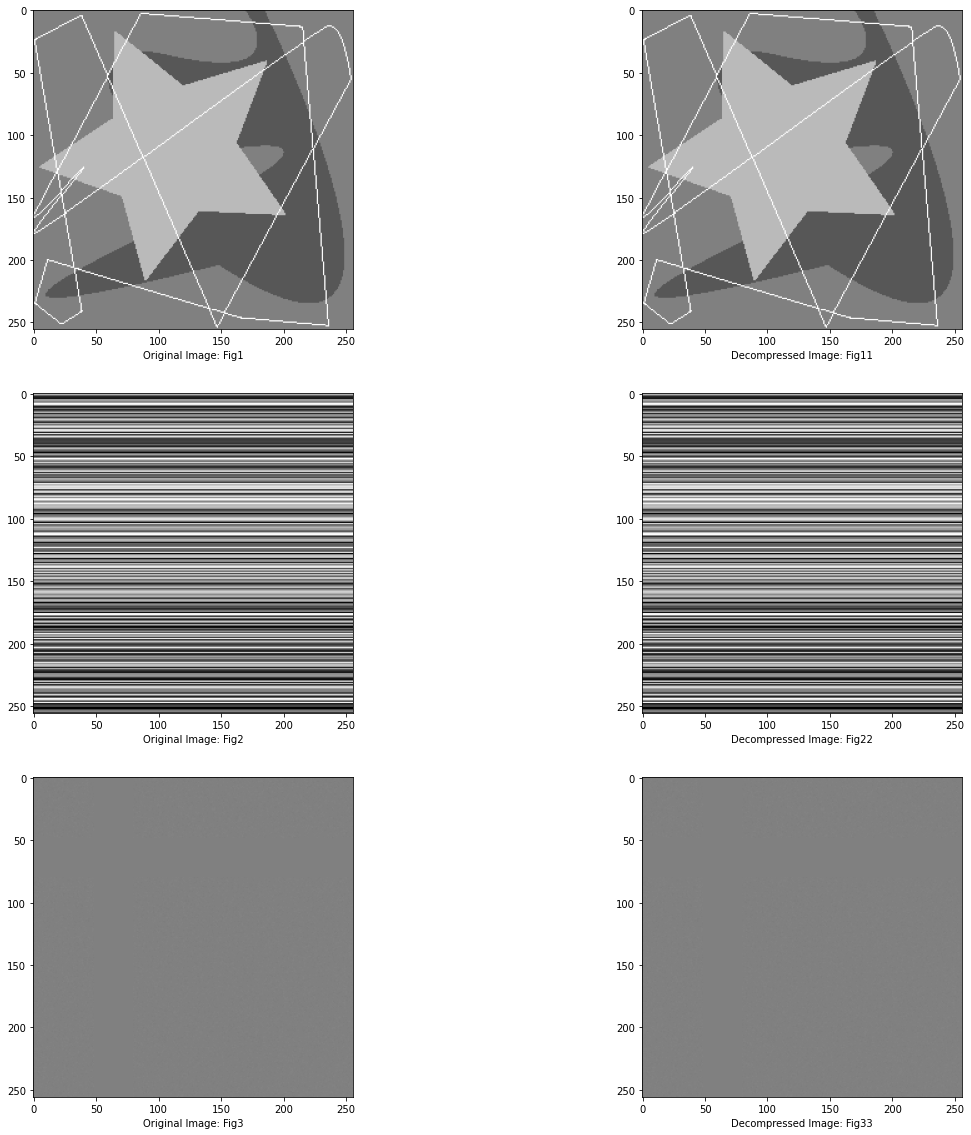

In [13]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure( figsize = (20, 20))

plt.subplot(3, 2, 1)
plt.xlabel('Original Image: Fig1')
plt.imshow(original1, cmap='gray', vmin=0, vmax=255)
plt.subplot(3, 2, 2)
plt.xlabel('Decompressed Image: Fig11')
plt.imshow(fig11, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 3)
plt.xlabel('Original Image: Fig2')
plt.imshow(fig2, cmap='gray', vmin=0, vmax=255)
plt.subplot(3, 2, 4)
plt.xlabel('Decompressed Image: Fig22')
plt.imshow(fig22, cmap='gray', vmin=0, vmax=255)

plt.subplot(3, 2, 5)
plt.xlabel('Original Image: Fig3')
plt.imshow(fig3, cmap='gray', vmin=0, vmax=255)
plt.subplot(3, 2, 6)
plt.xlabel('Decompressed Image: Fig33')
plt.imshow(fig33, cmap='gray', vmin=0, vmax=255)
plt.show()